In [1]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [34]:
import numpy as np

In [2]:
df = sns.load_dataset('seaice')

In [3]:
df.head(10)

,Date,Extent
0,1980-01-01,14.200
1,1980-01-03,14.302
2,1980-01-05,14.414
3,1980-01-07,14.518
4,1980-01-09,14.594
5,1980-01-11,14.665
6,1980-01-13,14.771
7,1980-01-15,14.831
8,1980-01-17,14.957
9,1980-01-19,15.120


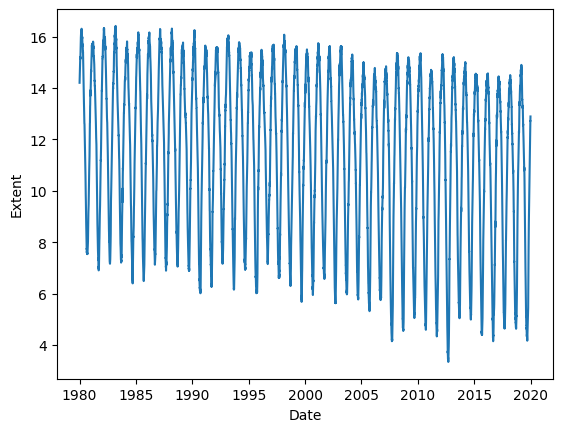

In [18]:
sns.lineplot(df, x="Date", y="Extent")
plt.show()

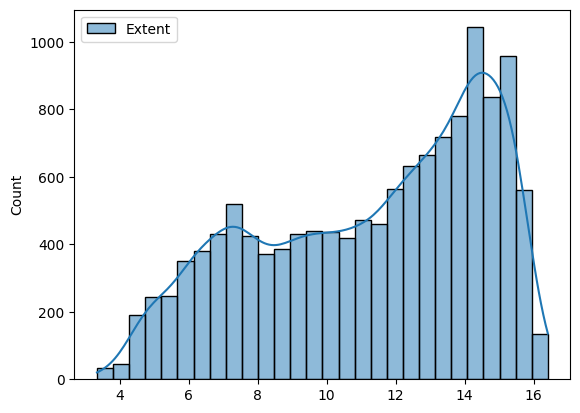

In [17]:
sns.histplot(df[["Extent"]], kde=True)
plt.show()

## KDE fit for sampling

In [19]:
from sklearn.neighbors import KernelDensity

In [20]:
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')

In [21]:
kde_fit = kde.fit(df[['Extent']])

In [22]:
sampled_data = kde_fit.sample(n_samples=len(df))

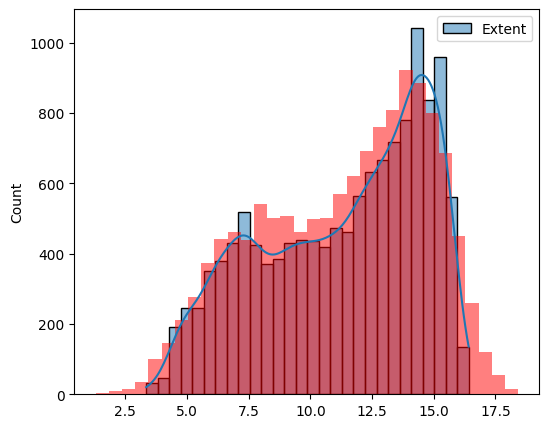

In [33]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
sns.histplot(df[["Extent"]], kde=True, ax=ax)
# sns.histplot(sampled_data, kde=True, ax=ax, color='r')
ax.hist(sampled_data, bins=32, color='r', alpha=0.5)
plt.show()

In [35]:
np.histogram_bin_edges(sampled_data, bins=32)

array([ 1.28815653,  1.82362685,  2.35909717,  2.89456749,  3.43003781,
        3.96550813,  4.50097845,  5.03644877,  5.57191909,  6.10738941,
        6.64285973,  7.17833005,  7.71380037,  8.24927069,  8.78474101,
        9.32021133,  9.85568165, 10.39115196, 10.92662228, 11.4620926 ,
       11.99756292, 12.53303324, 13.06850356, 13.60397388, 14.1394442 ,
       14.67491452, 15.21038484, 15.74585516, 16.28132548, 16.8167958 ,
       17.35226612, 17.88773644, 18.42320676])

In [36]:
kde_fit.get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 1.0,
 'breadth_first': True,
 'kernel': 'gaussian',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}

In [47]:
kde_fit.score(np.array([[13]]))

/home/sameervk/Documents/Training/MachineLearning/OpenDataScienceSandbox/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


np.float64(-2.1875271843830486)

In [49]:
kde_fit.score_samples(np.array([[13]]))

/home/sameervk/Documents/Training/MachineLearning/OpenDataScienceSandbox/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


array([-2.18752718])

In [48]:
np.exp(_)

np.float64(0.11219384055855082)

In [50]:
kde_fit.score(df[['Extent']])

np.float64(-32601.697131293608)

In [51]:
np.exp(_)

np.float64(0.0)